# A Comparison of k-Means and k-Medians: Robustness To Outliers

In [1]:
import numpy as np
import sklearn.preprocessing as skpp
import sklearn.datasets as skds
import matplotlib.pyplot as plt

import time
import itertools

from kquasicenters import KQuasicenters # this is the custom class

AttributeError: 'KQuasicenters' object has no attribute 'optimoids'

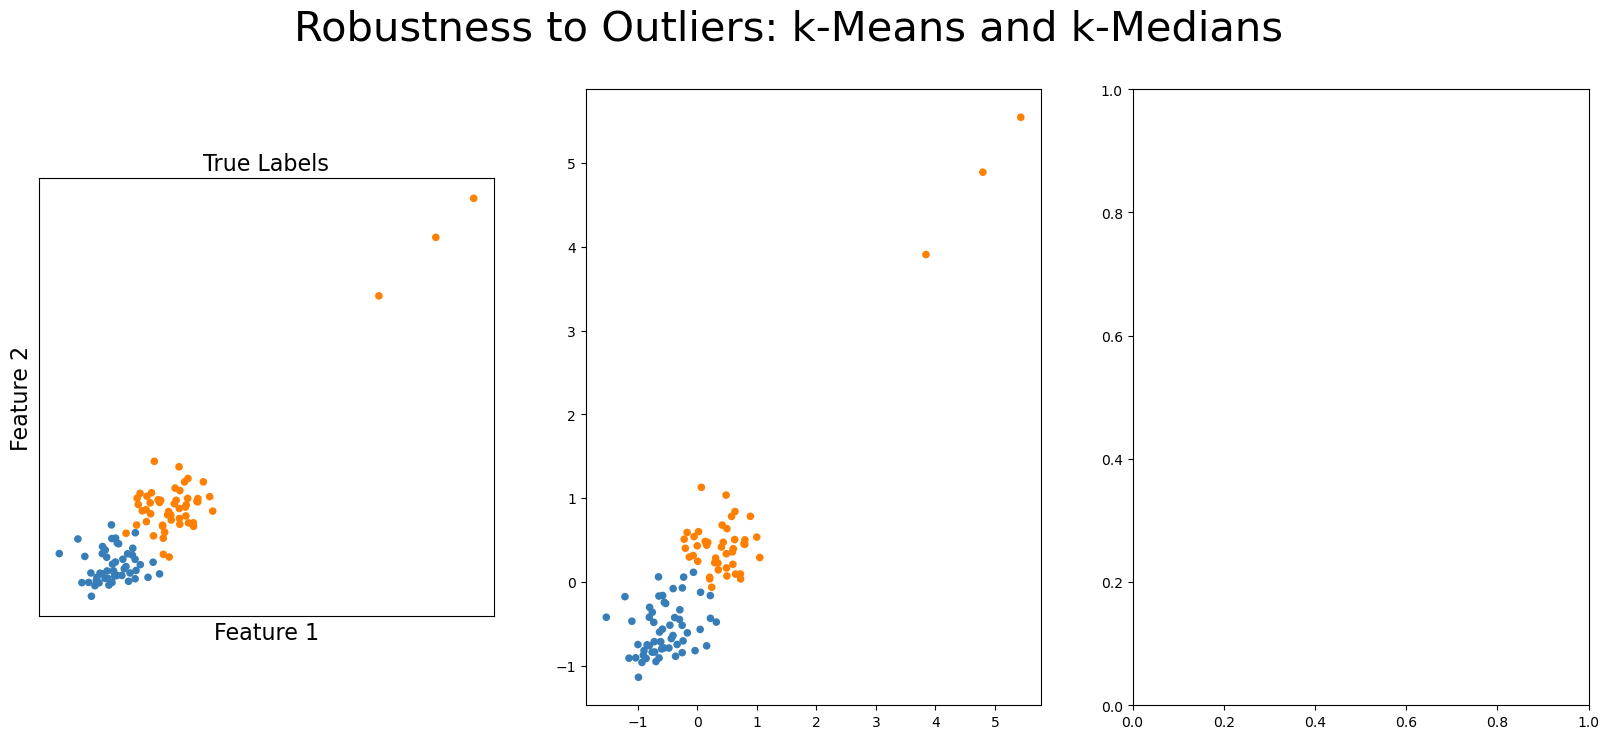

In [3]:
# Define a random seed for reproducibility
seed = 5
n_samples = 100

# Define the center of the main clusters
centers = [[1, 1], [4, 4]]

# Define the location of the outliers, which are far away from the main clusters
outliers = [[15, 15], [18, 18], [20, 20]]

# Generate synthetic dataset with two blobs and concatenate the outliers
X, y = skds.make_blobs(n_samples=n_samples, centers=centers, random_state=seed)
X = np.concatenate([X, outliers])
X = skpp.StandardScaler().fit_transform(X) # Standardize the data

# Concatenate the labels for the outliers. Here, the outliers are assigned to the second cluster (label = 1)
y = np.concatenate([y, [1, 1, 1]])

# List of cost metrics to compare
cost_metrics = ['squared_euclidean', 'euclidean']

# List of methods to be displayed on the plots
methods = ['k-Means', 'k-MEDIANS']

# Create subplots for each cost metric and an extra one for the true labels
fig, axes = plt.subplots(1, len(cost_metrics)+1, figsize=(20, 8))
fig.suptitle("Robustness to Outliers: k-Means and k-Medians", fontsize=30)

# Iterate over cost metrics and apply k-quasicenters clustering
for i, cost_metric in enumerate(cost_metrics):
    # Initialize optimoids with the given parameters and fit it to the data
    kquasicenters = KQuasicenters(n_clusters=2, max_iter=600, random_state=seed, verbose=False)
    kquasicenters.fit(X, cost_metric=cost_metric, max_steps=100)
    
    # Define a color scheme for visualizing clusters
    colors = np.array(list(itertools.islice(itertools.cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                        '#999999', '#e41a1c', '#dede00']), int(max(kquasicenters.labels) + 1))))
    # Plot the original data with true labels
    axes[0].scatter(X[:, 0], X[:, 1], c=colors[y], s=20)
    axes[0].set_title('True Labels', size=16)
    axes[0].set_xlabel("Feature 1", fontsize=16)
    axes[0].set_ylabel("Feature 2", fontsize=16)
    
    # Set common attributes for all subplots
    common_attributes = {
        'xticks': [],
        'yticks': [],
        'aspect': 'equal'
    }

    # Apply common attributes to the subplot with true labels
    plt.setp(axes[0], **common_attributes)

    # Plot the clustered data and optimoids for the current cost metric
    ax = axes[i+1]
    ax.scatter(X[:, 0], X[:, 1], c=colors[kquasicenters.labels], s=20)
    ax.scatter(kquasicenters.optimoids[:, 0], kquasicenters.optimoids[:, 1], marker='X', c='red', s=200, zorder=9)
    ax.set_title(methods[i], size=16)

    # Apply common attributes to the current subplot
    plt.setp(ax, **common_attributes)

    # Display the clustering accuracy in the bottom right corner of the current subplot
    plt.text(.99, .01, ('Accuracy:\n%.1f%%' % (100*max(np.mean(kquasicenters.labels == y), np.mean(kquasicenters.labels != y)))).lstrip('0'),
             transform=ax.transAxes, size=16, horizontalalignment='right')

# Adjust layout for better visualization
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)

# Display the figure
plt.show()
